In [ ]:
Cíle:
    Provést průzkumnou faktorovou analýzu s cílem zjistit latentní proměnné a pochopit, které faktory spokojenosti zákazníků se sdružují do skupin

    Které faktory ovlivňují spokojenost nejvíce? Provedeme logistickou regresi

    Prozkoumat významné proměnné a vizualizovat je.




In [172]:
# Načtení průzkumu z .xlsx formátu.

library(readxl)
f <- read_excel("satisfaction.xlsx")

In [173]:
# Názvy sloupců jsou v angličtině

colnames(f)

[1] "id"                                "satisfaction_v2"                  
 [3] "Gender"                            "Customer Type"                    
 [5] "Age"                               "Type of Travel"                   
 [7] "Class"                             "Flight Distance"                  
 [9] "Seat comfort"                      "Departure/Arrival time convenient"
[11] "Food and drink"                    "Gate location"                    
[13] "Inflight wifi service"             "Inflight entertainment"           
[15] "Online support"                    "Ease of Online booking"           
[17] "On-board service"                  "Leg room service"                 
[19] "Baggage handling"                  "Checkin service"                  
[21] "Cleanliness"                       "Online boarding"                  
[23] "Departure Delay in Minutes"        "Arrival Delay in Minutes"

In [174]:
# Změníme je raději na české

colnames(f) <- c("id", "spokojenost", "pohlavi", "typ_zakaznika", "vek", "typ_cestovani", "trida", "vzdalenost_letu", "komfort_sedadla",
                 "cas_odlet_prilet_pohodlnost", "jidlo_a_piti", "poloha_gate", "wifi_na_palube", "zabava_na_palube", "online_podpora",
                 "snadnost_online_rezervace", "sluzby_na_palube", "sluzby_pro_prostor_na_nohy", "manipulace_s_batohem",
                 "checkin_sluzba", "cistota", "online_nastup", "zpozdeni_odletu_v_minutach", "zpozdeni_priletu_v_minutach")

In [156]:
# Kontrola

colnames(f)
length(colnames(f))

[1] "id"                              "spokojenost"                    
 [3] "pohlavi"                         "typ_zakaznika"                  
 [5] "vek"                             "typ_cestovani"                  
 [7] "trida"                           "vzdalenost_letu"                
 [9] "wifi_na_palube"                  "pohodli_pri_case_odlotu_priletu"
[11] "snadnost_online_rezervace"       "poloha_gate"                    
[13] "jidlo_a_piti"                    "online_nastup"                  
[15] "komfort_sedadla"                 "zabava_na_palube"               
[17] "sluzby_na_palube"                "sluzby_pro_prostor_na_nohy"     
[19] "manipulace_s_batohem"            "checkin_sluzba"                 
[21] "sluzby_na_palube"                "cistota"                        
[23] "zpozdeni_odlotu_v_minutach"      "zpozdeni_priletu_v_minutach"

In [125]:
# Rozměry souboru

dim(f)

[1] 129880     24

In [177]:
# Zkontrolujeme, zda se v datasetu vyskytují chybějící hodnoty

sum(is.na(f))

# Čištění, zbavme se prázdných hodnot
f <- na.omit(f)

# Zkontrolujeme
sum(is.na(df))

[1] 393

[1] 0

In [183]:
# Začněme seznámením s obsahem sloupců

head(f, 3)

id,spokojenost,pohlavi,typ_zakaznika,vek,typ_cestovani,trida,vzdalenost_letu,komfort_sedadla,cas_odlet_prilet_pohodlnost,...,online_podpora,snadnost_online_rezervace,sluzby_na_palube,sluzby_pro_prostor_na_nohy,manipulace_s_batohem,checkin_sluzba,cistota,online_nastup,zpozdeni_odletu_v_minutach,zpozdeni_priletu_v_minutach
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0
110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305
103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0


In [7]:
# Popisná statistika

summary(f)

       X                id            Gender          Customer.Type     
 Min.   :     0   Min.   :     1   Length:103904      Length:103904     
 1st Qu.: 25976   1st Qu.: 32534   Class :character   Class :character  
 Median : 51952   Median : 64857   Mode  :character   Mode  :character  
 Mean   : 51952   Mean   : 64924                                        
 3rd Qu.: 77927   3rd Qu.: 97368                                        
 Max.   :103903   Max.   :129880                                        
                                                                        
      Age        Type.of.Travel        Class           Flight.Distance
 Min.   : 7.00   Length:103904      Length:103904      Min.   :  31   
 1st Qu.:27.00   Class :character   Class :character   1st Qu.: 414   
 Median :40.00   Mode  :character   Mode  :character   Median : 843   
 Mean   :39.38                                         Mean   :1189   
 3rd Qu.:51.00                                         3rd Qu

In [178]:
library(skimr)

skim(f)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,spokojenost,0,1,9,23,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA
2,character,pohlavi,0,1,4,6,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA
3,character,typ_zakaznika,0,1,14,17,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA
4,character,typ_cestovani,0,1,15,15,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA
5,character,trida,0,1,3,8,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA
6,numeric,id,0,1,NA,NA,NA,NA,NA,64958.335169,37489.781165,1,32494.5,64972,97415.5,129880,<U+2587><U+2587><U+2587><U+2587><U+2587>
7,numeric,vek,0,1,NA,NA,NA,NA,NA,39.428761,15.117597,7,27.0,40,51.0,85,<U+2583><U+2587><U+2587><U+2585><U+2581>
8,numeric,vzdalenost_letu,0,1,NA,NA,NA,NA,NA,1981.008974,1026.884131,50,1359.0,1924,2543.0,6951,<U+2583><U+2587><U+2582><U+2581><U+2581>
9,numeric,komfort_sedadla,0,1,NA,NA,NA,NA,NA,2.838586,1.392873,0,2.0,3,4.0,5,<U+2587><U+2587><U+2587><U+2587><U+2585>


-- Data Summary ------------------------
                           Values
Name                       f     
Number of rows             129487
Number of columns          24    
_______________________          
Column type frequency:           
  character                5     
  numeric                  19    
________________________         
Group variables            None  

-- Variable type: character ----------------------------------------------------
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 spokojenost           0             1   9  23     0        2          0
2 pohlavi               0             1   4   6     0        2          0
3 typ_zakaznika         0             1  14  17     0        2          0
4 typ_cestovani         0             1  15  15     0        2          0
5 trida                 0             1   3   8     0        3          0

-- Variable type: numeric ------------------------------------------------------
   skim_var

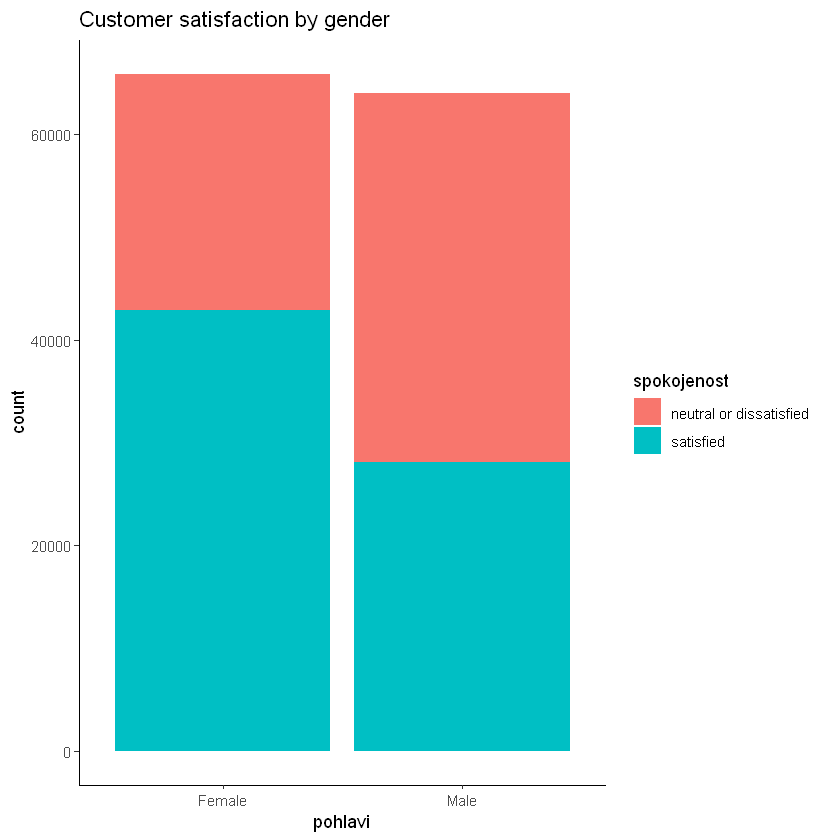

In [167]:
gender_statis_bar <- ggplot(f, aes(x=pohlavi, fill=spokojenost)) +
  geom_bar() +
  theme_classic() +
  labs(title = "Customer satisfaction by gender")


print(gender_statis_bar)

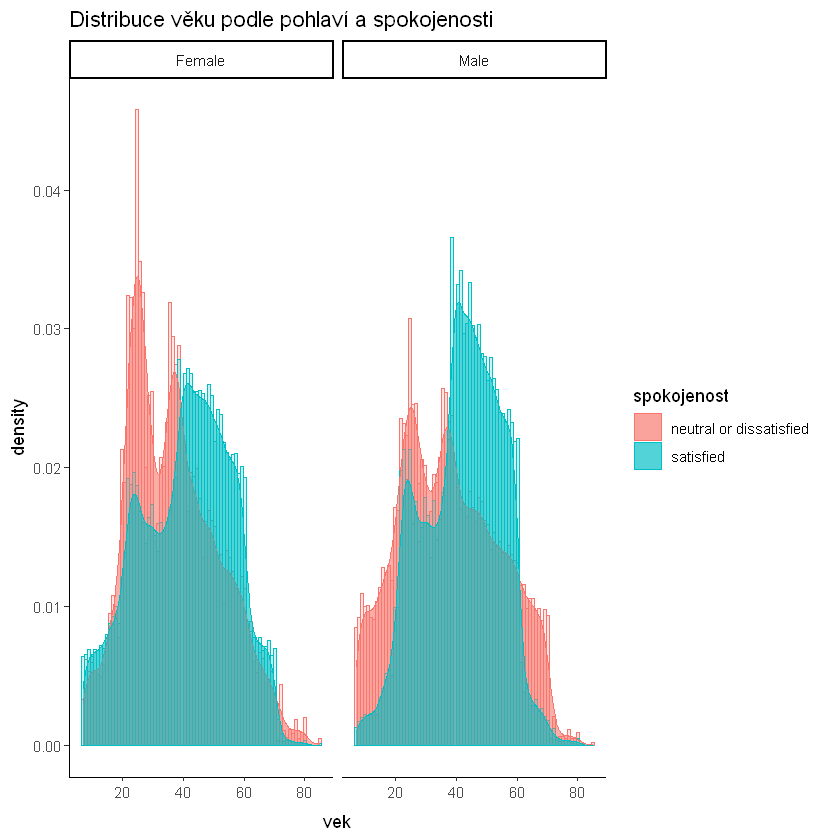

In [204]:
# Muži a ženy představují v celkovém souboru údajů téměř stejný podíl. 
# Vidíme, že nespokojených zákazníků mužského pohlaví je více než žen.

age_hist <- ggplot(f, aes(x=vek, fill=spokojenost, color=spokojenost)) +
  geom_histogram(aes(y=after_stat(density)), position="identity", alpha=0.2, bins=80)+ 
  geom_density(alpha=0.6)+
  labs(title="Distribuce věku podle pohlaví a spokojenosti") +
  theme_classic() +
  facet_grid(~pohlavi)

print(age_hist)

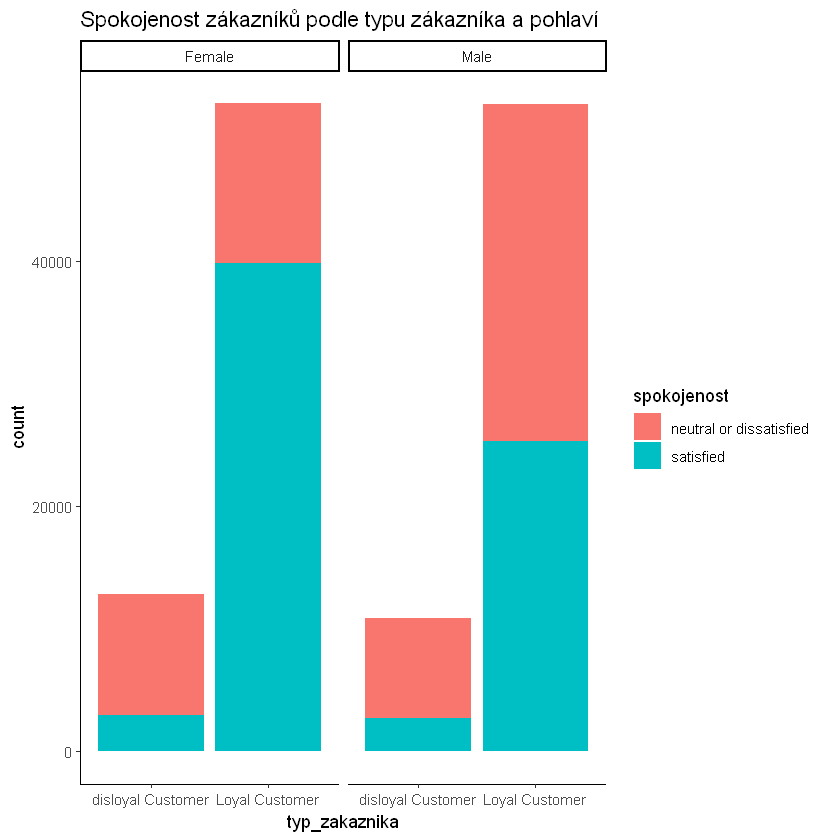

In [185]:


gender_statis_type_bar <- ggplot(f, aes(x=typ_zakaznika, fill=spokojenost)) +
      geom_bar() +
      theme_classic() +
      labs(title = "Spokojenost zákazníků podle typu zákazníka a pohlaví") +
      facet_grid(~pohlavi)
    
print(gender_statis_type_bar)

In [ ]:
Nejvíce nespokojených zákazníků je ve věku 25 a 35 let. 
Dalo by se říci, že nejvíce nespokojených zákazníků je ve věku 18 až 40 let. 
Ženy mají vyšší vrcholy ve srovnání s muži, ale ve věku od 45 do 70 let 
je více nespokojených mužů.

Jak můžeme vidět na grafu spokojených vpravo, zákazníci dosahují vrcholu kolem 40 let. 
Předtím je pouze jeden mírný vrchol ve věku 25 let. Z toho bychom mohli říci, že mezi ženami
je více nespokojených v mladším věku, zatímco muži jsou více rozděleni, speciálně ve vyšším věku.

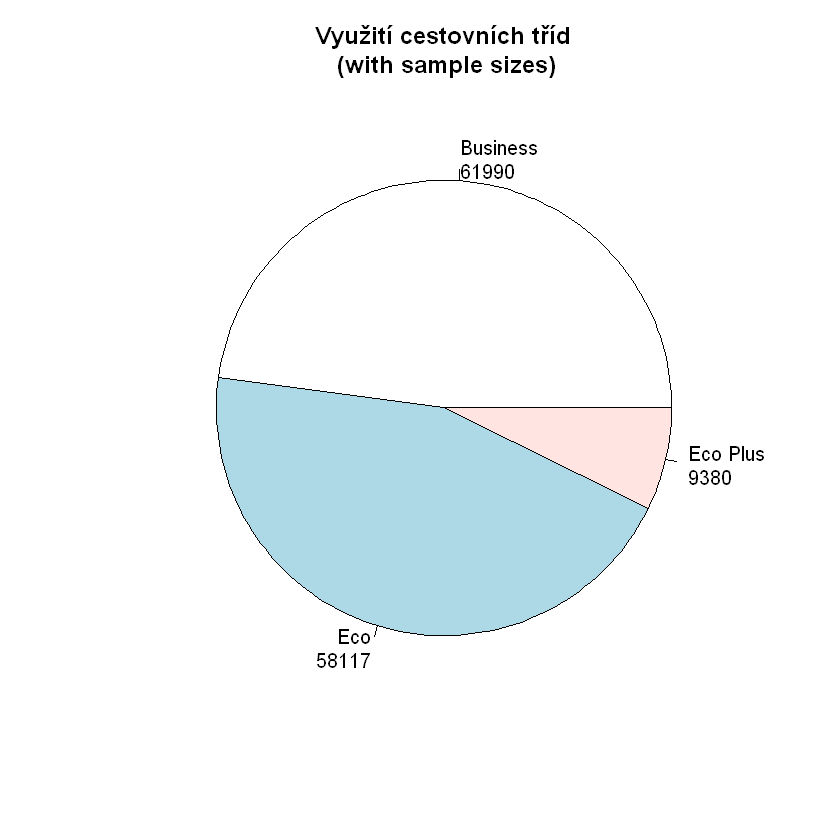

In [187]:
# Koláčový graf zobrazující zastoupení zakoupené třídy mezi dotazovanými

tab <- table(f$trida)
kol <- paste(names(tab), "\n", tab, sep="")
pie(tab, labels = kol,
    main="Využití cestovních tříd\n (with sample sizes)")

In [ ]:
Jaka jsou omezeni datasetu?

1. Neznáme ceny letenek
2. Spokojenost je definována velmi úzce dvěmi hodnotami, chtělo by to škálu 1 až 5, 
kterou by šlo získat leda zprůměrováním odpovědí v jednotlivých kategoriích
3. V první časti se podívame na obsah datasetu (popisná statistika a explorativní analýza). 

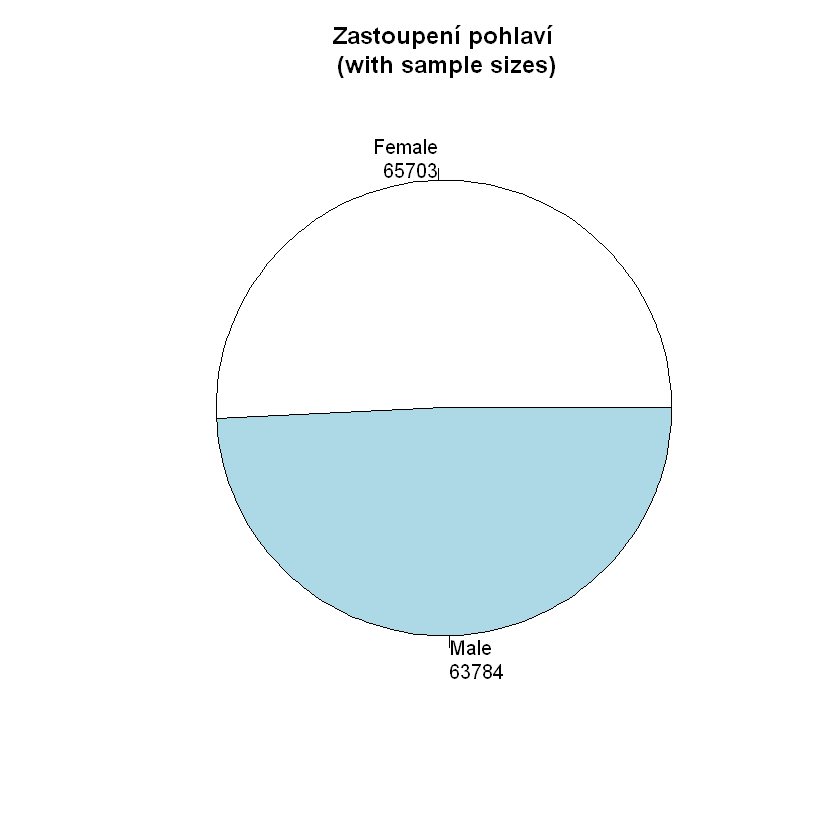

In [188]:
# Koláčový graf zobrazující zastoupení zakoupené třídy mezi dotazovanými

tab <- table(f$pohlavi)
kol <- paste(names(tab), "\n", tab, sep="")
pie(tab, labels = kol,
    main="Zastoupení pohlaví\n (with sample sizes)") 

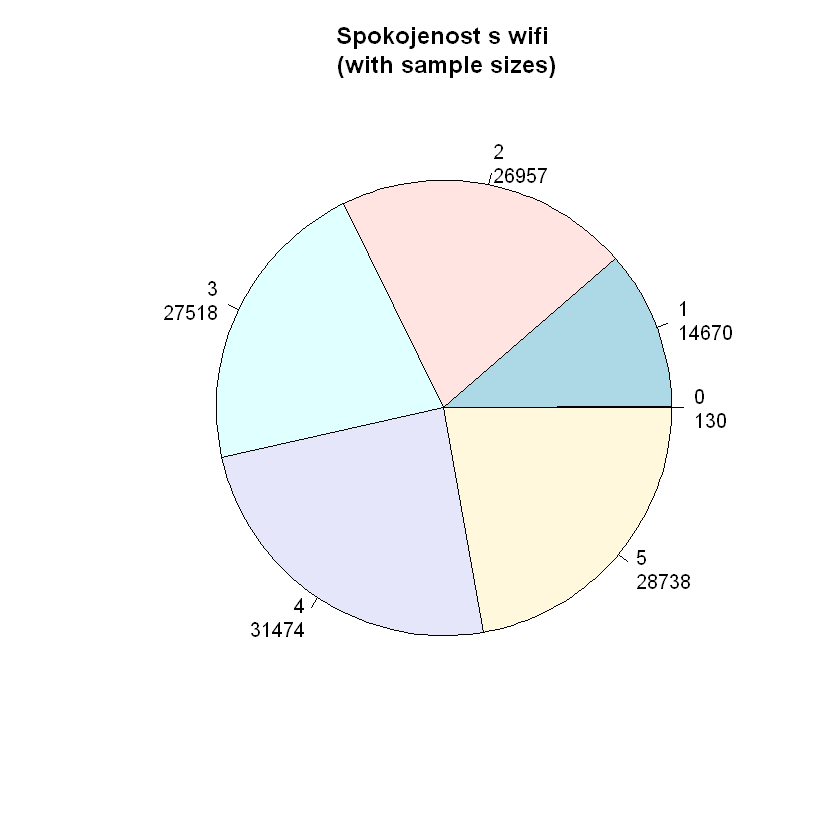

In [191]:
tab <- table(f$wifi_na_palube)
kol <- paste(names(tab), "\n", tab, sep="")
pie(tab, labels = kol,
    main="Spokojenost s wifi\n (with sample sizes)") 

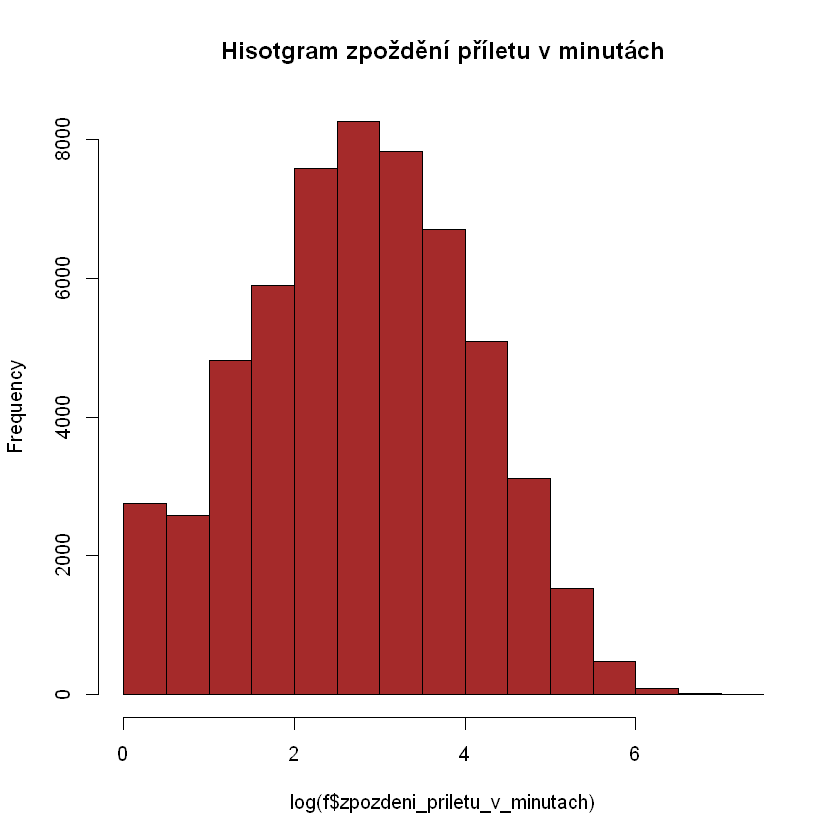

In [194]:
# Nejčastější zpoždění pozorujeme mezi dvěmi až čtyřmi minutami

hist(log(f$zpozdeni_priletu_v_minutach), col="brown", main = "Hisotgram zpoždění příletu v minutách")
# Pro vykreslení je použit histogram s logaritmickou škálou

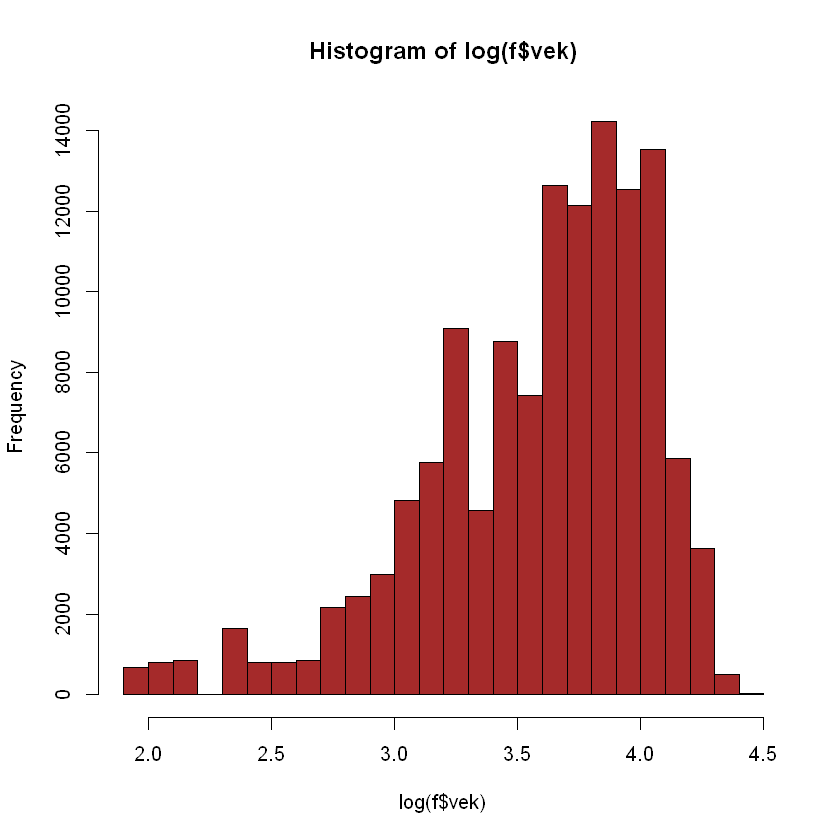

In [205]:
# Nejčastější zpoždění pozorujeme mezi dvěmi až čtyřmi minutami

hist(log(f$vek), col="brown")
# Pro vykreslení je použit histogram s 

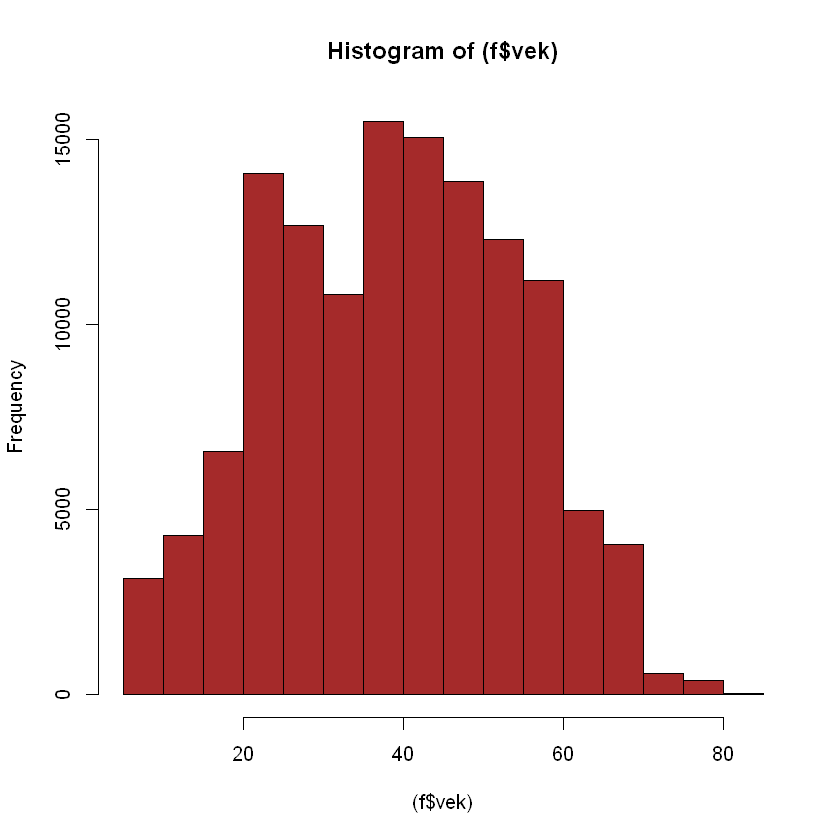

In [198]:
hist((f$vek), col="brown")


neutral or dissatisfied               satisfied 
                  58605                   70882 

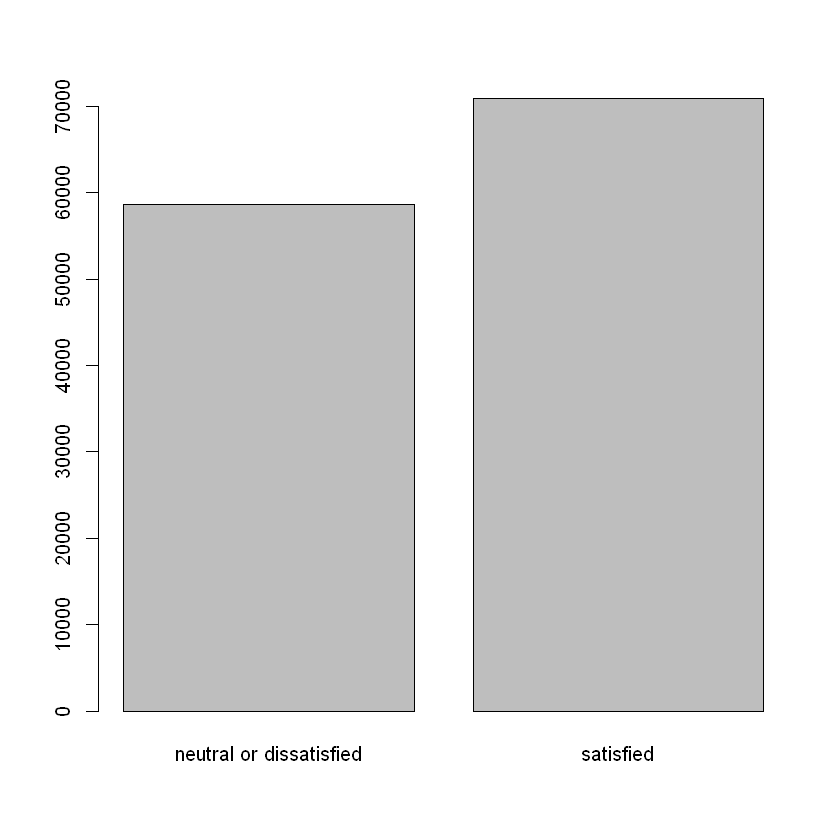

In [207]:
# Zobrazení proměnné s třídou character (pomocí table)

tabledata <- table(f$spokojenost)

barplot(tabledata)
table(f$spokojenost)

In [197]:
# Musim zprovoznit korelacni matrix, bere jen numericke hodnoty, takze vybrat jen numericke sloupce

library(ggcorrplot)

ggcorrplot(f, hc.order = T, type = "lower",
           outline.col = "white",
           ggtheme = ggplot2::theme_gray,
           colors = c("#6D9EC1", "white", "#E46726"))
http://www.sthda.com/english/wiki/ggcorrplot-visualization-of-a-correlation-matrix-using-ggplot2


ERROR: Error in ggcorrplot(as.numeric(f), hc.order = T, type = "lower", outline.col = "white", : 'list' object cannot be coerced to type 'double'


In [ ]:
Random forest?

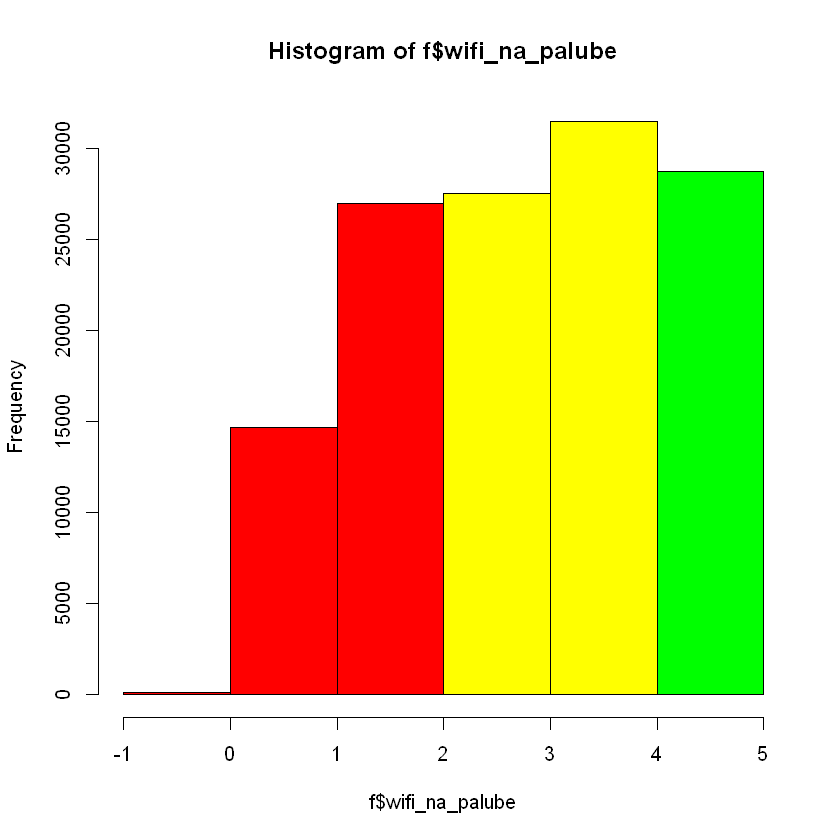

In [199]:
# Net Promoter Score
# První pokus přes histogram

hist(f$wifi_na_palube, breaks=-1:5, col=c(rep("red",3), rep("yellow",2), rep("green", 1)))

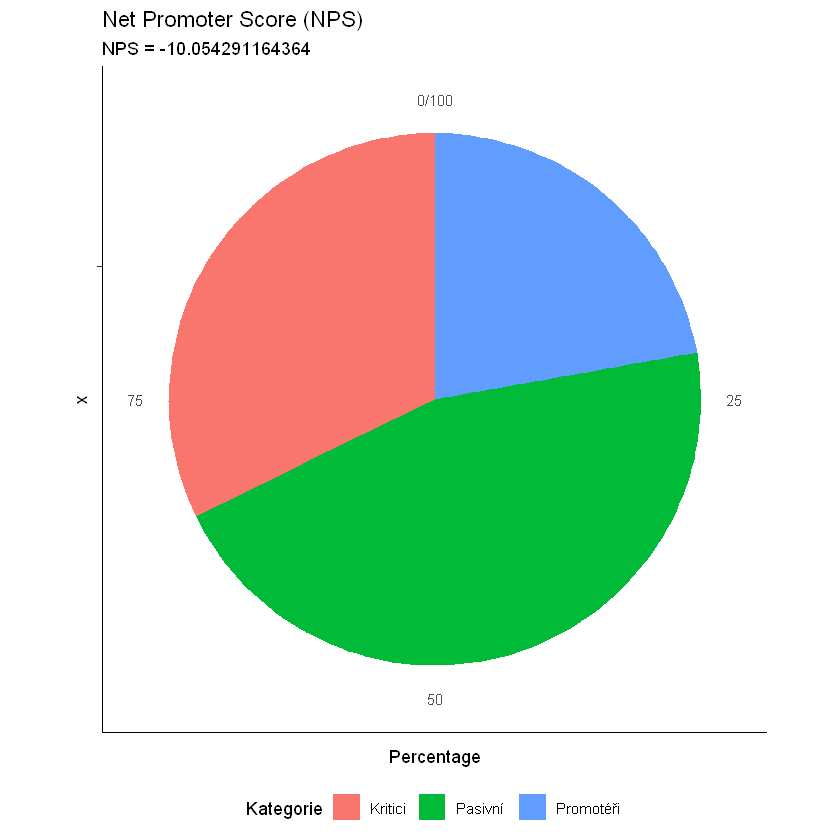

In [208]:
o <- f$wifi_na_palube

# Výpočet procenta promotérů, pasivních a kritiků
promoters <- sum(o >= 5) / length(o) * 100
passives <- sum(o >= 3 & o <= 4) / length(o) * 100
detractors <- sum(o <= 2) / length(o) * 100

# Výpočet Net Promoter Score (NPS)
nps <- promoters - detractors

# Vytvoření datového rámce pro graf
nps_data <- data.frame(Category = c("Promotéři", "Pasivní", "Kritici"),
                       Percentage = c(promoters, passives, detractors))

# Vykreslení grafu pomocí ggplot2
ggplot(nps_data, aes(x = "", y = Percentage, fill = Category)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  theme_classic() +
  theme(legend.position = "bottom") +
  labs(title = "Net Promoter Score (NPS)",
       subtitle = paste0("NPS = ", nps),
       fill = "Kategorie")

In [184]:
colnames(f)

[1] "id"                          "spokojenost"                
 [3] "pohlavi"                     "typ_zakaznika"              
 [5] "vek"                         "typ_cestovani"              
 [7] "trida"                       "vzdalenost_letu"            
 [9] "komfort_sedadla"             "cas_odlet_prilet_pohodlnost"
[11] "jidlo_a_piti"                "poloha_gate"                
[13] "wifi_na_palube"              "zabava_na_palube"           
[15] "online_podpora"              "snadnost_online_rezervace"  
[17] "sluzby_na_palube"            "sluzby_pro_prostor_na_nohy" 
[19] "manipulace_s_batohem"        "checkin_sluzba"             
[21] "cistota"                     "online_nastup"              
[23] "zpozdeni_odletu_v_minutach"  "zpozdeni_priletu_v_minutach"

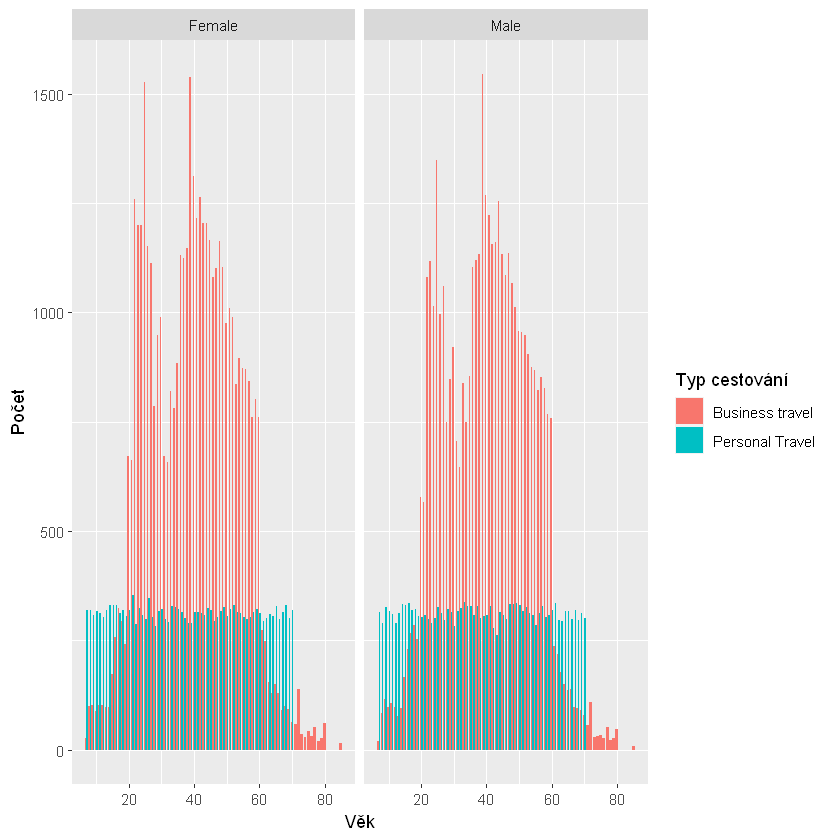

In [209]:
# Pracovní cesty jsou celkem 

ggplot(f, aes(x = vek, fill = typ_cestovani)) +
  geom_bar(position = "dodge") +
  facet_grid(. ~ pohlavi) +
  labs(x = "Věk", y = "Počet", fill = "Typ cestování")

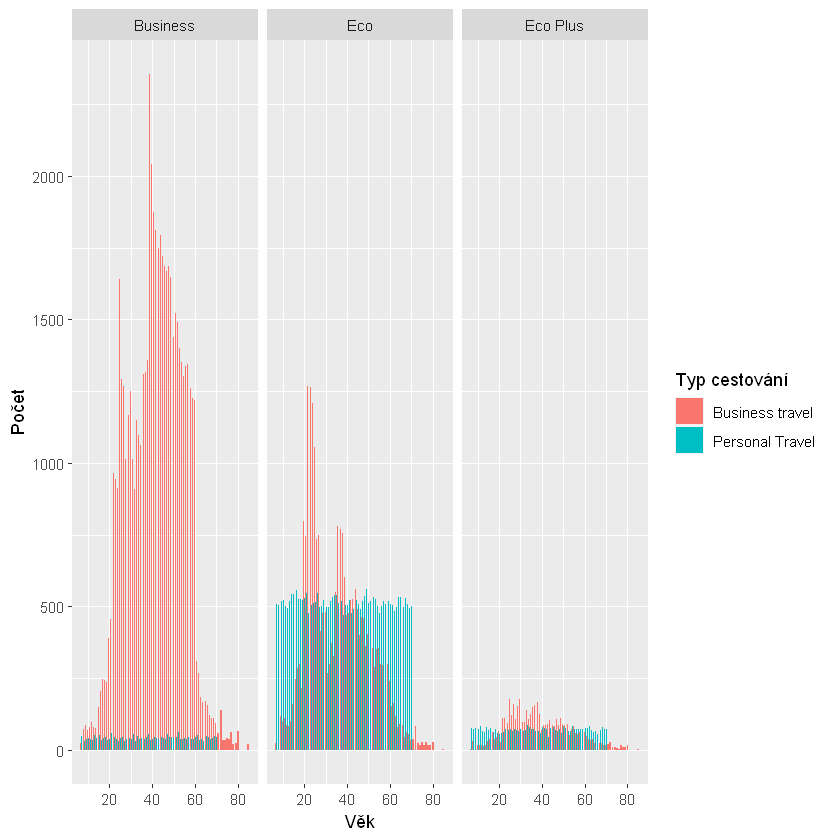

In [203]:
# 

ggplot(f, aes(x = vek, fill = typ_cestovani)) +
  geom_bar(position = "dodge") +
  facet_grid(. ~ trida) +
  labs(x = "Věk", y = "Počet", fill = "Typ cestování")

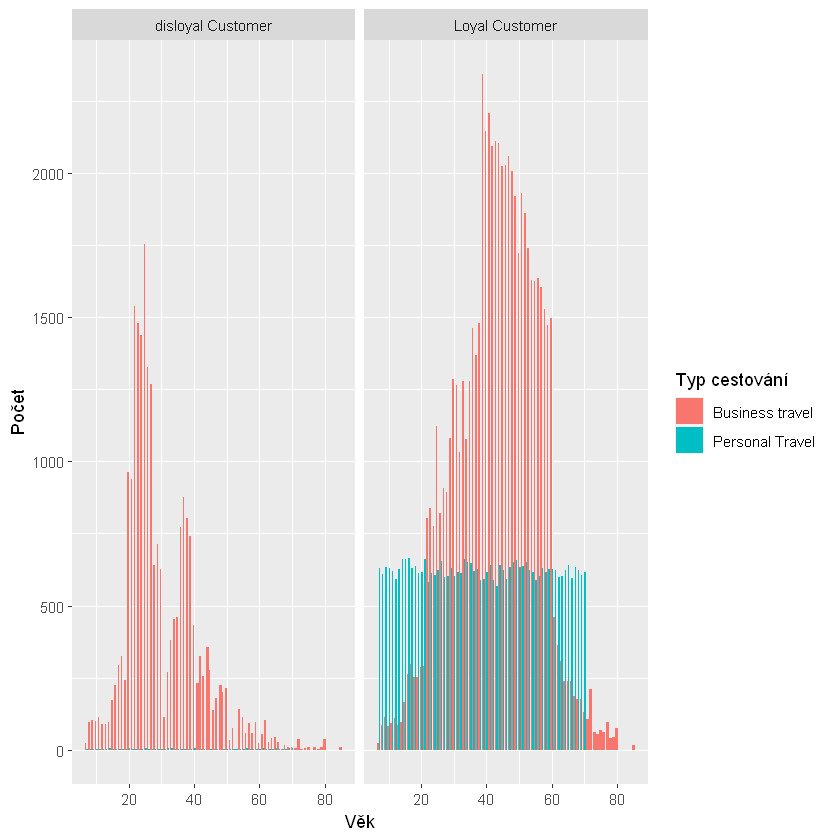

In [210]:
ggplot(f, aes(x = vek, fill = typ_cestovani)) +
  geom_bar(position = "dodge") +
  facet_grid(. ~ typ_zakaznika) +
  labs(x = "Věk", y = "Počet", fill = "Typ cestování")

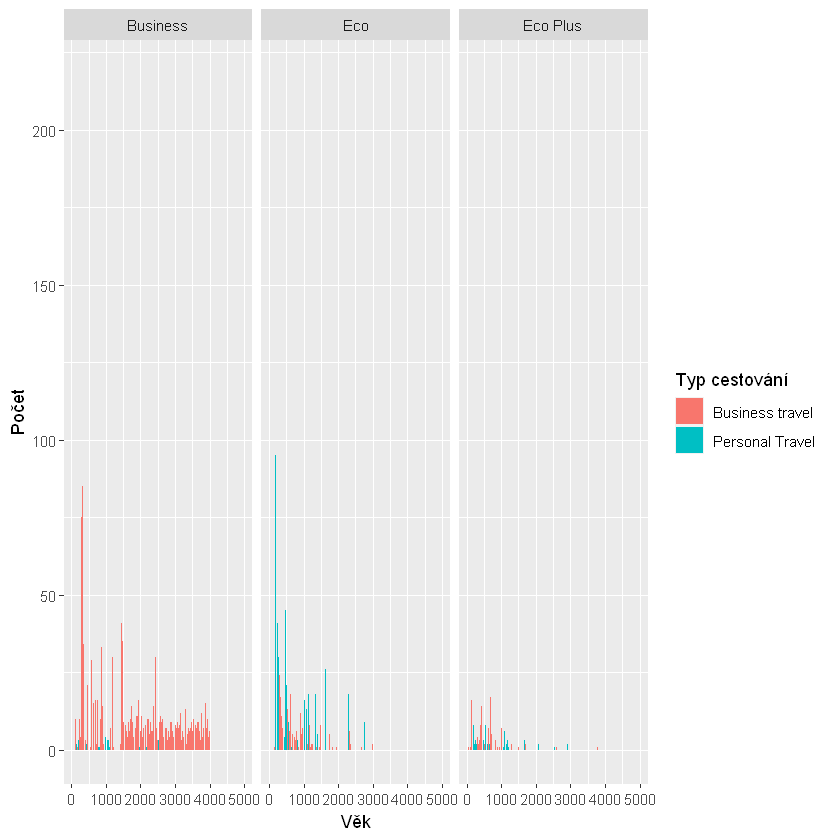

In [42]:
ggplot(f, aes(x = Flight.Distance, fill = typ_cestovani)) +
  geom_bar(position = "dodge") +
  facet_grid(. ~ trida) +
  labs(x = "Věk", y = "Počet", fill = "Typ cestování")